In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
vra = open('/content/drive/MyDrive/Bangkit Academy/Final Project - Capstone/03 Dataset/Domestic Violence in Spain 2003-2017.csv', 'r', errors='ignore').readlines()

# Preview
for row in vra[:5]:
  print(row.split(','))

print('\nNumber of Rows:',len(vra))

['Month', 'Year', 'Autonomous Community', 'Province', 'Relation', 'Victim Age', 'Agressor Age', 'Previous Abuse Report', 'Living Together', 'Victims\n']
['January', '2003', 'Andaluca', 'Almera', 'Partner', '41-50 years', '51-64 years', 'Unknown', 'Yes', '1\n']
['January', '2003', 'Andaluca', 'Granada', 'Partner', '75-84 years', '75-84 years', 'Unknown', 'Yes', '1\n']
['January', '2003', 'Andaluca', 'Mlaga', 'Partner', '21-30 years', 'Unknown', 'Unknown', 'Yes', '1\n']
['January', '2003', 'Canarias', 'Santa Cruz de Tenerife', 'Partner', '31-40 years', 'Unknown', 'Unknown', 'Yes', '1\n']

Number of Rows: 901


In [4]:
vra_splited = []
for row in vra:
  vra_splited.append(row.split(','))

In [5]:
def remove_n(text):
  return text[:-1]

In [6]:
df_vra = pd.DataFrame(vra_splited)
df_vra[9] = df_vra[9].apply(lambda x: remove_n(x))
df_vra.columns = df_vra.iloc[0]
df_vra = df_vra.iloc[1:].reset_index(drop=True)
df_vra.head()

,Month,Year,Autonomous Community,Province,Relation,Victim Age,Agressor Age,Previous Abuse Report,Living Together,Victims
0,January,2003,Andaluca,Almera,Partner,41-50 years,51-64 years,Unknown,Yes,1
1,January,2003,Andaluca,Granada,Partner,75-84 years,75-84 years,Unknown,Yes,1
2,January,2003,Andaluca,Mlaga,Partner,21-30 years,Unknown,Unknown,Yes,1
3,January,2003,Canarias,Santa Cruz de Tenerife,Partner,31-40 years,Unknown,Unknown,Yes,1
4,January,2003,Catalua,Barcelona,Ex-partner,31-40 years,Unknown,Unknown,No,1


In [7]:
df_vra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Month                  900 non-null    object
 1   Year                   900 non-null    object
 2   Autonomous Community   900 non-null    object
 3   Province               900 non-null    object
 4   Relation               900 non-null    object
 5   Victim Age             900 non-null    object
 6   Agressor Age           900 non-null    object
 7   Previous Abuse Report  900 non-null    object
 8   Living Together        900 non-null    object
 9   Victims                900 non-null    object
dtypes: object(10)
memory usage: 70.4+ KB


# Features Exploration

## Features Correlated with Problem
* Month
* Year
* Relation
* Victim Age
* Agressor Age
* Previous Abuse Report
* Living Together

## Possible Feature Engineering
* Incident to Report Interval (Month/Year to Today)

In [8]:
df_vra_sort = df_vra.drop(columns=['Month', 'Year', 'Autonomous Community', 'Province', 'Victims'])
df_vra_sort.head()

,Relation,Victim Age,Agressor Age,Previous Abuse Report,Living Together
0,Partner,41-50 years,51-64 years,Unknown,Yes
1,Partner,75-84 years,75-84 years,Unknown,Yes
2,Partner,21-30 years,Unknown,Unknown,Yes
3,Partner,31-40 years,Unknown,Unknown,Yes
4,Ex-partner,31-40 years,Unknown,Unknown,No


In [9]:
for x in df_vra_sort.columns:
  print('{} Values'.format(x))
  print(df_vra_sort[x].value_counts().index.tolist())
  print('---------------------------------')

Relation Values
['Partner', 'Ex-partner', 'In separation process']
---------------------------------
Victim Age Values
['31-40 years', '41-50 years', '21-30 years', '51-64 years', '65-74 years', '75-84 years', '18-20 years', 'Unknown', '<16 years', '>85 years', '16-17 years']
---------------------------------
Agressor Age Values
['31-40 years', '41-50 years', '51-64 years', '21-30 years', 'Unknown', '65-74 years', '75-84 years', '>85 years', '18-20 years', '16-17 years']
---------------------------------
Previous Abuse Report Values
['No', 'Unknown', 'Yes', 'Ex-officio']
---------------------------------
Living Together Values
['Yes', 'No', 'Unknown']
---------------------------------


## Change Values for Scope Adjusment

In [10]:
relation = {
    'Partner' : 'Family',
    'Ex-partner' : 'Stranger',
    'In separation process' : 'Acquaintance'
}

par = {
    'Ex-officio' : 'Yes'
}

In [11]:
df_vra_sort['Relation'] = df_vra_sort['Relation'].replace(relation)
df_vra_sort['Previous Abuse Report'] = df_vra_sort['Previous Abuse Report'].replace(par)

In [12]:
for x in df_vra_sort.columns:
  print('{} Values'.format(x))
  print(df_vra_sort[x].value_counts().index.tolist())
  print('---------------------------------')

Relation Values
['Family', 'Stranger', 'Acquaintance']
---------------------------------
Victim Age Values
['31-40 years', '41-50 years', '21-30 years', '51-64 years', '65-74 years', '75-84 years', '18-20 years', 'Unknown', '<16 years', '>85 years', '16-17 years']
---------------------------------
Agressor Age Values
['31-40 years', '41-50 years', '51-64 years', '21-30 years', 'Unknown', '65-74 years', '75-84 years', '>85 years', '18-20 years', '16-17 years']
---------------------------------
Previous Abuse Report Values
['No', 'Unknown', 'Yes']
---------------------------------
Living Together Values
['Yes', 'No', 'Unknown']
---------------------------------


In [13]:
# Relation Values
relation_enc = {
    'Family':0, 
    'Stranger':1, 
    'Acquaintance':2
}

# Victim Age Values
vic_enc = {
    '<16 years':0, 
    '16-17 years':1, 
    '18-20 years':2, 
    '21-30 years':3, 
    '31-40 years':4, 
    '41-50 years':5, 
    '51-64 years':5, 
    '65-74 years':6, 
    '75-84 years':7, 
    '>85 years':8,
    'Unknown':9
}

# Agressor Age Values
agr_enc = {
    '<16 years':0, 
    '16-17 years':1, 
    '18-20 years':2, 
    '21-30 years':3, 
    '31-40 years':4, 
    '41-50 years':5, 
    '51-64 years':5, 
    '65-74 years':6, 
    '75-84 years':7, 
    '>85 years':8,
    'Unknown':9
}

# Previous Abuse Report Values
par_enc = {
    'Yes':0, 
    'No':1, 
    'Unknown':2
}

# Living Together Values
lt_enc = {
    'Yes':0, 
    'No':1, 
    'Unknown':2
}

## Master Data Cleaned (Run This To Try Other Num of Cluster)

In [14]:
vra_dataset = df_vra_sort.copy()

In [16]:
vra_dataset_encoded = df_vra_sort.copy()
enc_dict = [relation_enc, vic_enc, agr_enc, par_enc, lt_enc]
var = vra_dataset_encoded.columns.tolist()
for i in range(5):
  vra_dataset_encoded[var[i]] = vra_dataset_encoded[var[i]].replace(enc_dict[i])
vra_dataset_encoded.head()

,Relation,Victim Age,Agressor Age,Previous Abuse Report,Living Together
0,0,5,5,2,0
1,0,7,7,2,0
2,0,3,9,2,0
3,0,4,9,2,0
4,1,4,9,2,1


# Clustering

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
vra_dataset_encoded_scaled = pd.DataFrame(scaler.fit_transform(vra_dataset_encoded))
vra_dataset_encoded_scaled.columns = df_vra_sort.columns
vra_dataset_encoded_scaled

,Relation,Victim Age,Agressor Age,Previous Abuse Report,Living Together
0,-0.559453,0.423375,-0.020174,1.503631,-0.735615
1,-0.559453,1.891729,1.190281,1.503631,-0.735615
2,-0.559453,-1.044978,2.400736,1.503631,-0.735615
3,-0.559453,-0.310802,2.400736,1.503631,-0.735615
4,1.438594,-0.310802,2.400736,1.503631,1.346314
...,...,...,...,...,...
895,-0.559453,-0.310802,-0.020174,-0.023759,1.346314
896,-0.559453,0.423375,-0.020174,-0.023759,-0.735615
897,1.438594,-0.310802,-0.020174,-1.551150,1.346314
898,3.436641,-1.044978,-0.020174,-0.023759,1.346314


## Cluster based on Elbow - 3 Cluster

In [19]:
vra_dataset_3c = df_vra_sort.copy()
vra_dataset_encoded_3c = vra_dataset_encoded.copy()

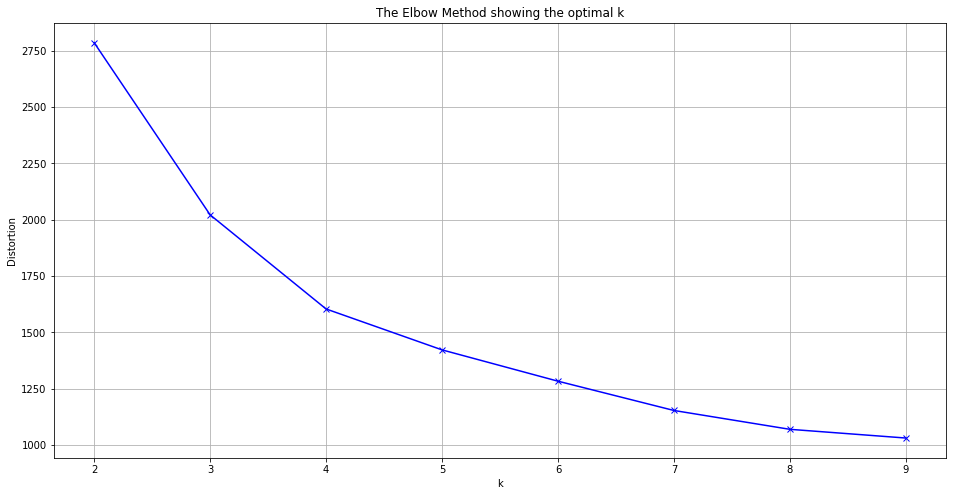

In [20]:
distortions = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(vra_dataset_encoded_3c)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.grid()
plt.show()

Best K = 3 

In [21]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(vra_dataset_encoded_3c)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [22]:
vra_cluster_3c = kmeans.predict(vra_dataset_encoded_3c)
print(vra_cluster_3c)

[0 2 2 2 2 0 0 1 0 2 0 1 0 2 2 0 0 2 1 2 2 1 0 2 2 2 2 2 2 2 2 2 0 0 1 2 1
 2 1 2 2 0 2 2 2 0 2 1 2 2 2 2 0 2 0 2 1 1 2 2 0 2 0 2 0 2 0 0 0 1 0 0 2 1
 2 1 1 1 1 1 2 1 0 1 2 1 2 0 0 2 1 1 0 2 2 2 1 0 2 0 1 0 2 0 0 1 2 0 2 1 1
 2 1 0 0 2 1 2 1 1 2 1 2 1 2 1 0 1 1 0 0 1 2 2 0 0 2 2 2 2 2 2 0 1 2 1 0 2
 2 1 2 1 2 1 1 0 2 1 1 2 2 1 2 0 2 1 0 2 0 2 1 1 0 2 1 1 1 0 0 0 2 1 2 2 0
 1 1 0 0 1 0 2 0 2 2 0 0 2 1 0 0 0 2 0 1 1 1 1 1 1 1 0 1 1 2 0 1 1 1 1 0 0
 1 2 2 1 0 0 1 1 0 1 2 0 0 1 0 2 0 2 1 1 0 1 0 1 1 1 1 1 1 0 1 0 2 0 1 1 1
 2 1 0 2 1 0 2 1 1 0 1 0 0 0 0 1 0 0 1 2 1 0 1 1 0 1 0 2 0 1 1 1 1 0 2 1 0
 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1
 2 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 2 0 1 2 0 1
 1 1 0 1 0 0 0 1 1 1 0 1 0 2 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0 0 2 1 1
 2 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 2 0 0 1 0 1 0 1 1 1 1 0 1 0 1 2 0 0
 1 0 0 1 0 1 0 2 1 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 2 1 0 0 1 1 0 0 1 0 0
 0 1 0 1 0 2 1 0 0 0 1 0 

### Join Cluster to Dataset

In [23]:
vra_dataset_3c['cluster'] = vra_cluster_3c
vra_dataset_3c.head()

,Relation,Victim Age,Agressor Age,Previous Abuse Report,Living Together,cluster
0,Family,41-50 years,51-64 years,Unknown,Yes,0
1,Family,75-84 years,75-84 years,Unknown,Yes,2
2,Family,21-30 years,Unknown,Unknown,Yes,2
3,Family,31-40 years,Unknown,Unknown,Yes,2
4,Stranger,31-40 years,Unknown,Unknown,No,2


In [30]:
vra_dataset_3c.to_csv('/content/drive/MyDrive/Bangkit Academy/Final Project - Capstone/03 Dataset/violence_risk_assessment_dataset', index=False)

In [24]:
vra_dataset_encoded_3c['cluster'] = vra_cluster_3c
vra_dataset_encoded_3c.head()

,Relation,Victim Age,Agressor Age,Previous Abuse Report,Living Together,cluster
0,0,5,5,2,0,0
1,0,7,7,2,0,2
2,0,3,9,2,0,2
3,0,4,9,2,0,2
4,1,4,9,2,1,2


### Cluster Distribution

In [25]:
print('Cluster Distribution')
vra_dataset_3c['cluster'].value_counts()

Cluster Distribution


0    414
1    341
2    145
Name: cluster, dtype: int64

### Analyzing Cluster

In [26]:
cls0 = vra_dataset_encoded_3c[vra_dataset_encoded_3c['cluster'] == 0].reset_index(drop=True)
cls1 = vra_dataset_encoded_3c[vra_dataset_encoded_3c['cluster'] == 1].reset_index(drop=True)
cls2 = vra_dataset_encoded_3c[vra_dataset_encoded_3c['cluster'] == 2].reset_index(drop=True)

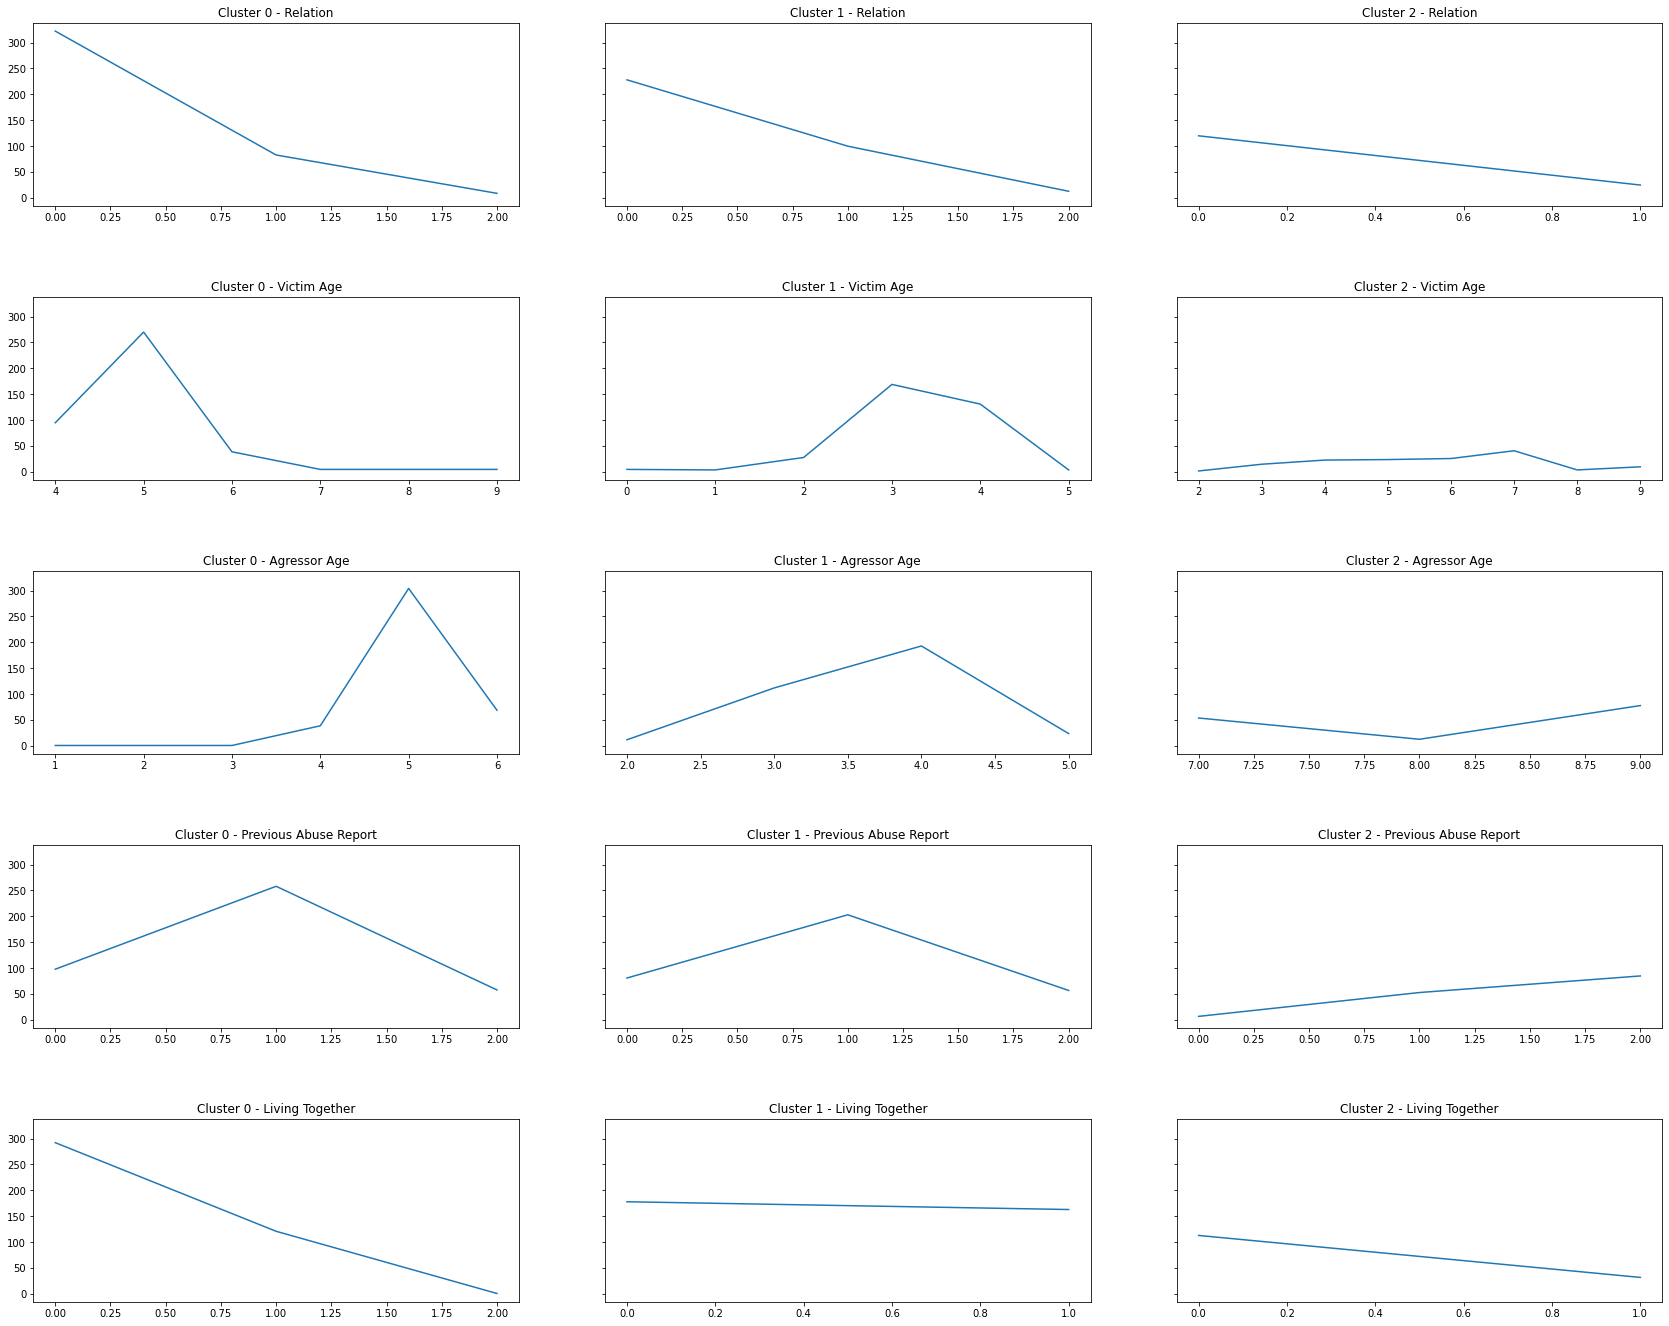

In [27]:
cluster_data = [cls0, cls1, cls2]
var = vra_dataset_encoded_3c.columns[:-1]
var_iter = 0

fig, ax = plt.subplots(5, 3, figsize=(25,20), sharey=True)
fig.tight_layout(pad=7) 
for row in range(5):
  for col in range(3):
    ax[row][col].plot(cluster_data[col][var[var_iter]].value_counts().sort_index())
    ax[row][col].title.set_text('Cluster {} - {}'.format(col, var[var_iter]))
  var_iter+=1
plt.show()

#### Victim vs Agressor

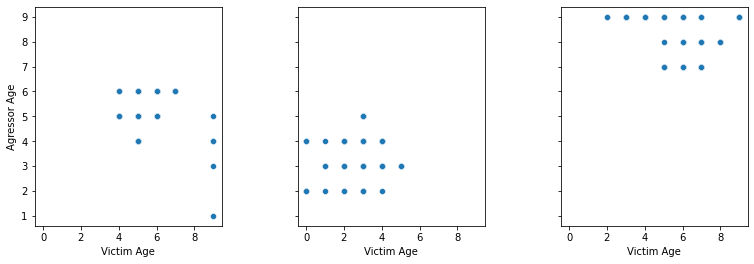

In [28]:
cluster_data = [cls0, cls1, cls2]

fig, ax = plt.subplots(ncols=3, figsize=(12,5), sharex=True, sharey=True)
fig.tight_layout(pad=6.0)
for col in range(3):
  sns.scatterplot(
      x=cluster_data[col]['Victim Age'], 
      y=cluster_data[col]['Agressor Age'], 
      ax=ax[col]
  )

#### Victim lives together with Agressor?

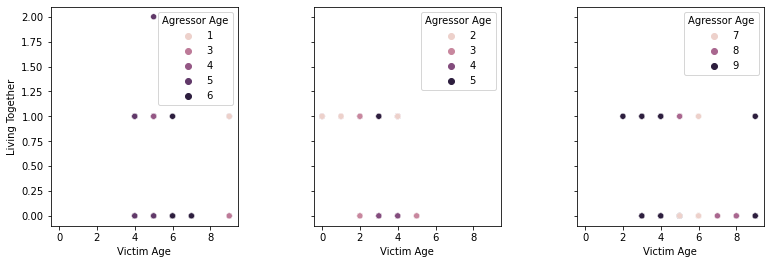

In [ ]:
cluster_data = [cls0, cls1, cls2]

fig, ax = plt.subplots(ncols=3, figsize=(12,5), sharex=True, sharey=True)
fig.tight_layout(pad=6.0)
for col in range(3):
  sns.scatterplot(
      x=cluster_data[col]['Victim Age'], 
      y=cluster_data[col]['Living Together'], 
      hue=cluster_data[col]['Agressor Age'], 
      ax=ax[col]
  )
plt.show()

### Conclusion based on Victim
* Cluster 1 - Higher Risk
* Cluster 0 - Moderate Risk
* Cluster 2 - Lower Risk